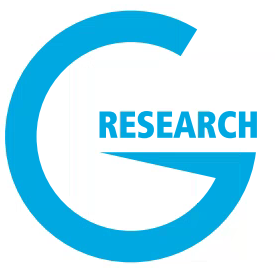
# G-Research Financial Forecasting Challenge
## Tutorial
The aim of this tutorial is to load the training data set, fit some simple models, and generate a submission file.

First, load some data science libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

Read the training data set and display the first few rows.

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,4.416943e-05,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,4.193762e-05,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,2.030442e-06,0.000306,4.079460e-08,159.692076,-0.000003,29.824024
3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,6.980798e-07,0.000205,9.502066e-09,212.160378,-0.000008,100.388668
4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,2.064450e-05,0.001525,3.428403e-07,153.724351,0.000065,5.950714


Now read the test data set. Note that the return $y$ and weights $w$ are missing

In [3]:
df_test = pd.read_csv('test.csv', index_col=0)
df_test.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
Index,,,,,,,,,,,,,,
0,1,13,363,0.000842,0.436594,0.477848,1.535381e-06,4.353950e-06,7.718616e-06,1.632886e-05,3.267851e-05,0.001661,9.724611e-07,112.968475
1,1,13,1223,0.020800,0.636143,0.670798,5.204133e-06,9.546012e-06,1.575258e-05,2.804666e-05,1.082500e-05,0.002104,2.146299e-05,100.000000
2,1,13,1372,0.068580,0.478891,0.481816,5.433730e-08,1.733539e-07,3.866963e-07,8.520664e-07,2.103176e-06,0.000222,3.085296e-08,188.335508
3,1,13,1942,0.011986,0.463201,0.294900,1.103215e-08,3.555558e-08,7.280376e-08,1.364231e-07,3.155050e-07,0.000141,1.678216e-08,212.123913
4,1,13,2712,0.000164,0.549980,0.352332,4.494670e-07,8.503405e-07,1.222847e-06,1.901114e-06,4.048304e-06,0.001235,4.595200e-07,124.024977


## 1. Mean model
Firstly, we will try a simple model that the predicted return is equal to the mean return for each stock.

In [4]:
stock_mean = df.groupby('Stock')['y'].mean()
stock_mean.head()

Stock
0    0.000890
1    0.000151
2   -0.000069
3   -0.000109
4    0.000023
Name: y, dtype: float64

Now we use the stockwise means to make predictions $y_p$ for the test set and write them to a csv file.

In [5]:
yp = df_test['Stock'].map(stock_mean).rename('y')
yp.head()

Index
0    0.000482
1   -0.000071
2    0.000025
3    0.000019
4    0.000112
Name: y, dtype: float64

Unfortunately, one of the values is not a number (NaN). We could try replacing this with a prediction of 0.

In [6]:
yp[yp.isnull()]

Index
43289   NaN
Name: y, dtype: float64

In [7]:
yp.fillna(0).to_csv('mean_model.csv', header=True)

## 2. Linear model
Choose one of the predictors $x_4$ and build a linear model of the form
$$y_p = \alpha + \beta x_4$$

In [8]:
model = sklearn.linear_model.LinearRegression()

X = df[['x4']]
y = df['y']
model.fit(X, y)

print('alpha:  \t', model.intercept_)
print('beta:   \t', model.coef_[0])

print('r^2 score:\t', model.score(X, y))

alpha:  	 -7.28920282437e-05
beta:   	 0.0836916860756
r^2 score:	 0.0341790057712


Make a plot using seaborn (only plot every 100th point to save time)

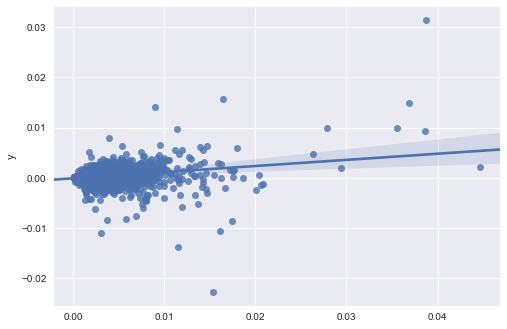

In [9]:
sns.regplot(X[::100], y[::100]);

Use the model to make predictions and write them to csv

In [10]:
yp = pd.Series(model.predict(df_test[['x4']])).rename('y')
yp.index.name = 'Index'
yp.head()

Index
0    0.000066
1    0.000103
2   -0.000054
3   -0.000061
4    0.000030
Name: y, dtype: float64

In [11]:
yp.to_csv('linear_model.csv', header=True)